In [ ]:
%cd ..

/app


In [ ]:
import librosa
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from tonami import pitch_process as pp
from tonami import user
from tonami import Utterance as u
from tonami import Classifier as c

In [52]:
# Consts
filename = 'data/demo/ma.mp3'
# filename = 'data/user_audio/testing/ex7_wo3_2022-03-03_193430.mp3'
DB_THRESHOLD = 10
user_info = user.User(320, 100)
clf = c.Classifier(4)
clf.load_clf('tonami/data/pickled_svm_80.pkl')

Text(0.5, 1.0, 'Time Series')

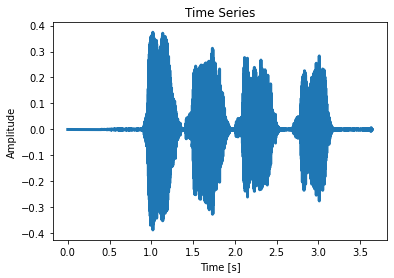

In [54]:
time_series, samplerate = librosa.load(filename)
time = np.arange(0, len(time_series)/samplerate, 1/samplerate)
plt.plot(time, time_series, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Series')

Text(0.5, 1.0, 'Time Series, Trim')

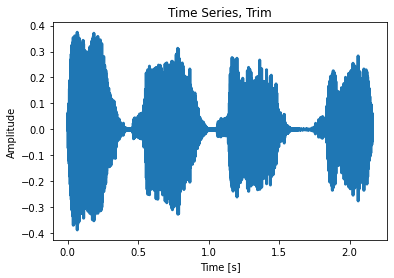

In [58]:
f_time_series, _ = librosa.effects.trim(y=time_series, top_db=DB_THRESHOLD)
time = np.arange(0, len(f_time_series)/samplerate, 1/samplerate)
plt.plot(time, f_time_series, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Series, Trim')

Text(0.5, 1.0, 'Time Series')

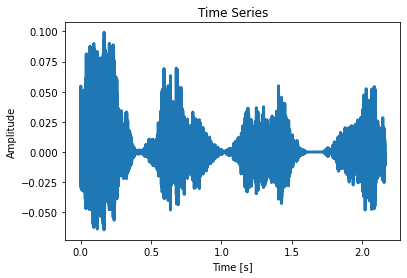

In [59]:
db = librosa.power_to_db(np.abs(librosa.stft(f_time_series))**2)
db[db < DB_THRESHOLD] = -80
reconstructed = librosa.istft(librosa.db_to_power(db)**(1/2))
time = np.arange(0, len(reconstructed)/samplerate, 1/samplerate)
plt.plot(time, reconstructed, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time Series, Attenuated')

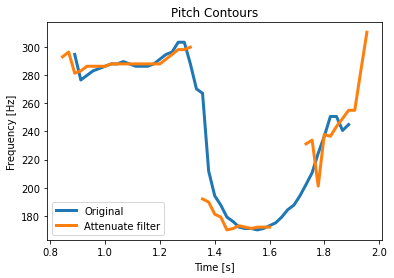

In [ ]:
pitch_contour, _, _ = librosa.pyin(time_series, fmin=50, fmax=400)
f_pitch_contour, _, _ = librosa.pyin(f_time_series, fmin=50, fmax=400)
a_pitch_contour, _, _ = librosa.pyin(reconstructed, fmin=50, fmax=400)
time1 = np.arange(0, len(pitch_contour)/45, 1/45)
time = np.arange(0, len(f_pitch_contour)/45, 1/45)
plt.plot(time1, pitch_contour, linewidth=3)
plt.plot(time, f_pitch_contour, linewidth=3)
plt.plot(time, a_pitch_contour, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Pitch Contours')
plt.legend(['Original', 'Trim filter', 'Attenuate filter'])